In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import random


In [2]:
# url = "https://finance.yahoo.com/topic/stock-market-news/"

url = "https://finance.yahoo.com/quote/TSLA/history?period1=1676766418&period2=1708302418&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"

headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36' } 

html_data = requests.get(url,headers=headers, timeout=5)
print("response.ok : {} , response.status_code : {}".format(html_data.ok , html_data.status_code))


response.ok : True , response.status_code : 200


In [3]:
soup = BeautifulSoup(html_data.text, 'html5lib')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html class="NoJs chrome desktop" data-color-theme="light" id="atomic" lang="en-US"><head prefix="og: https://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Tesla, Inc. (TSLA) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta content="TSLA, Tesla, Inc., TSLA historical prices, Tesla, Inc. historical prices, historical prices, stocks, quotes, finance" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="458584288257241" property="fb:app_id"/><meta content="#400090" name="theme-color"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="Discover historical prices for TSLA stock on Yahoo Finance. View daily, weekly or monthly format back to when Tesla, Inc. stock was issued." lang="en-US" name="description"/><meta content="gu

In [4]:
soup.title.string

'Tesla, Inc. (TSLA) Stock Historical Prices & Data - Yahoo Finance'

In [12]:
tesla_df = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj_Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all('td')

    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

    tesla_df = tesla_df.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [13]:
tesla_df.head(5)

,Date,Open,High,Low,Close,Adj_Close,Volume,Adj Close
0,"Feb 16, 2024",202.06,203.17,197.40,199.95,NaN,"111,173,600",199.95
1,"Feb 15, 2024",189.16,200.88,188.86,200.45,NaN,"120,831,800",200.45
2,"Feb 14, 2024",185.30,188.89,183.35,188.71,NaN,"81,203,000",188.71
3,"Feb 13, 2024",183.99,187.26,182.11,184.02,NaN,"86,759,500",184.02
4,"Feb 12, 2024",192.11,194.73,187.28,188.13,NaN,"95,498,600",188.13


### Using yfinance to extract data from yahoo finance instead of web scraping 

In [31]:
import yfinance as yf
from matplotlib import pyplot as plt

In [19]:
apple = yf.Ticker("AAPL")

In [20]:
apple.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [28]:
apple_data = apple.history(period="max").reset_index()
apple_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0


<AxesSubplot:xlabel='Date'>

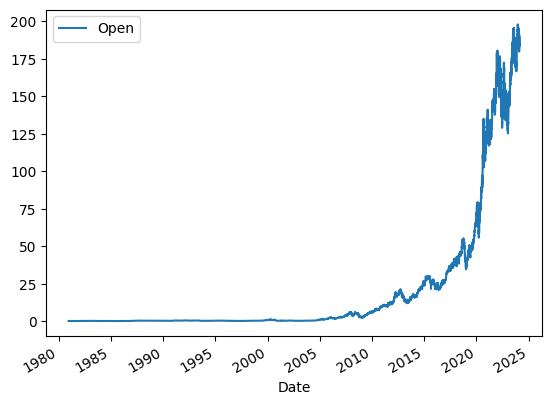

In [35]:
apple_data.plot(x="Date", y = ["Open"])

In [3]:
from configparser import ConfigParser

In [12]:
def load_config(filename='database.ini', section='postgresql'):
    parser = ConfigParser()
    parser.read(filename)

    # get section, default to postgresql
    config = {}
    if parser.has_section(section):
        params = parser.items(section)
        for param in params:
            config[param[0]] = param[1]
    else:
        raise Exception('Section {0} not found in the {1} file'.format(section, filename))

    return config

In [11]:
import psycopg2

def connect(config):
    """ Connect to the PostgreSQL database server """
    try:
        # connecting to the PostgreSQL server
        with psycopg2.connect(**config) as conn:
            print('Connected to the PostgreSQL server.')
            return conn
    except (psycopg2.DatabaseError, Exception) as error:
        print(error)

In [32]:
def create_tables():
    # commands = ["""
    #         CREATE TABLE vendors (
    #             vendor_id SERIAL PRIMARY KEY,
    #             vendor_name VARCHAR(255) NOT NULL
    #         )
    #             """]
    
    commands = ["""
            DROP TABLE vendors
                """]
    
    try:
        config = load_config()
        with psycopg2.connect(**config) as conn:
            with conn.cursor() as cur:
                # execute the CREATE TABLE statement
                for command in commands:
                    cur.execute(command)

        print("Executed")
    except (psycopg2.DatabaseError, Exception) as error:
        print(error)

In [33]:
create_tables()

Executed
